<h3 style="color:red;">Preterm neonate of 25+5 weeks of gestation and 0.826 kg with different sizes of the ductus arteriosus </h3>


 Model 'baseline neonate' loaded and initialized correctly.
 Ready in 3.7 sec. Average model step in 0.0307 ms.

Scaling baseline neonate with reference weight of 3.545 kg to weight 0.826 kg.
 Ready in 7.9 sec. Average model step in 0.0328 ms.

Model validation data:
----------------------
Heart rate max : 151        bpm, min: 148        bpm.
Bloodpressure  : 46/28 (34) mmHg
LVO            : 172.1 ml/kg/min
RVO            : 172.8 ml/kg/min
SVC flow       : 74.0 ml/kg/min
LVO/RVO ratio  : 0.9959196068594898

Note the reversed E/A ratio in the extreme premature born baby.


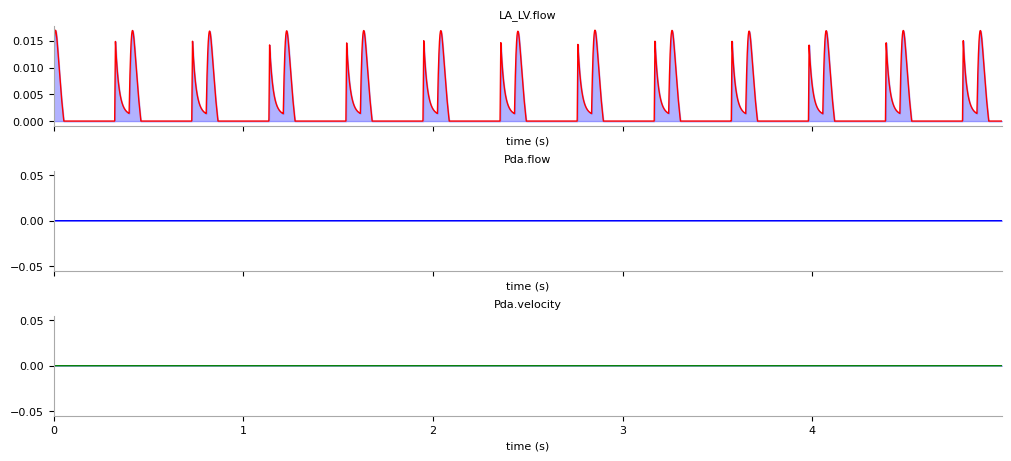

In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'baseline_neonate' model definition
model = ModelEngine("definitions/baseline_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

# scale the model
print("")
neo.scale_patient_by_gestational_age("25wks_no_pda", output=False)

# stabilize the model by calculating 60 seconds
neo.calculate(120)

# get the vaildation data from the model
result = neo.validate_pda()

# print the validation data
print("")
print("Model validation data:")
print("----------------------")
print(
    f"Heart rate max : {result['Heart.heart_rate.max']:<10.0f} bpm, min: {result['Heart.heart_rate.min']:<10.0f} bpm."
)
print(
    f"Bloodpressure  : {result['AA.pres.max']:<0.0f}/{result['AA.pres.min']:<0.0f} ({result['AA.pres.mean']:<0.0f}) mmHg"
)
print(f"LVO            : {result['LV_AA.flow.net']:<0.1f} ml/kg/min")
print(f"RVO            : {result['RV_PA.flow.net']:<0.1f} ml/kg/min")
print(f"SVC flow       : {result['SVC_RA.flow.net']:<0.1f} ml/kg/min")
print(f"LVO/RVO ratio  : {result['LV_AA.flow.net']/result['RV_PA.flow.net']}")
print("")
print("Note the reversed E/A ratio in the extreme premature born baby.")

# plot the flow across the mitral valve and pda flow velocity
neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=5.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
)

In [2]:
 model.models["DA"].el_base * model.models["DA"].el_base_scaling_factor

214588.37772397095

<h5>Open the ductus arteriosus in 10 seconds to a diameter of 3.0 mm creating a left-to-right shunt.</h5>

 Ready in 0.4 sec. Average model step in 0.2181 ms.

Opening the ductus arteriosus by increasing the diameter to 2.5 mm in 10 seconds


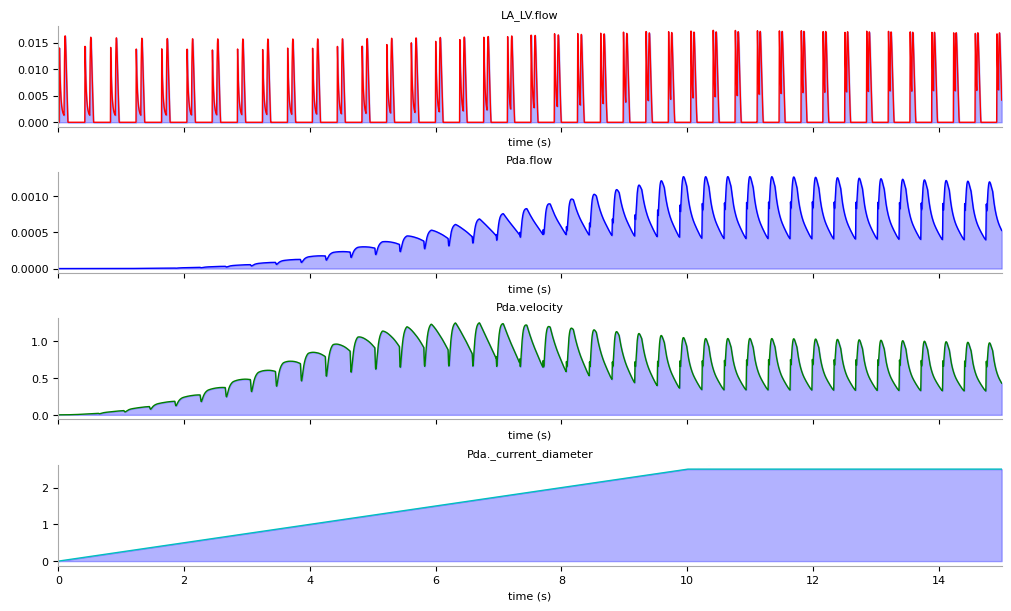

 Ready in 3.7 sec. Average model step in 0.0308 ms.

Model validation data:
----------------------
Heart rate max : 157        bpm, min: 156        bpm.
Bloodpressure  : 46/25 (32) mmHg
LVO            : 234.7 ml/kg/min
RVO            : 163.9 ml/kg/min
SVC flow       : 68.2 ml/kg/min
PDA flow       : 78.4 ml/kg/min
LVO/RVO ratio  : 1.43

Note the pseudo-normalization of the E/A ratio in the extreme premature born baby with a large shunt across the ductus arteriosus

 Ready in 0.1 sec. Average model step in 0.0576 ms.


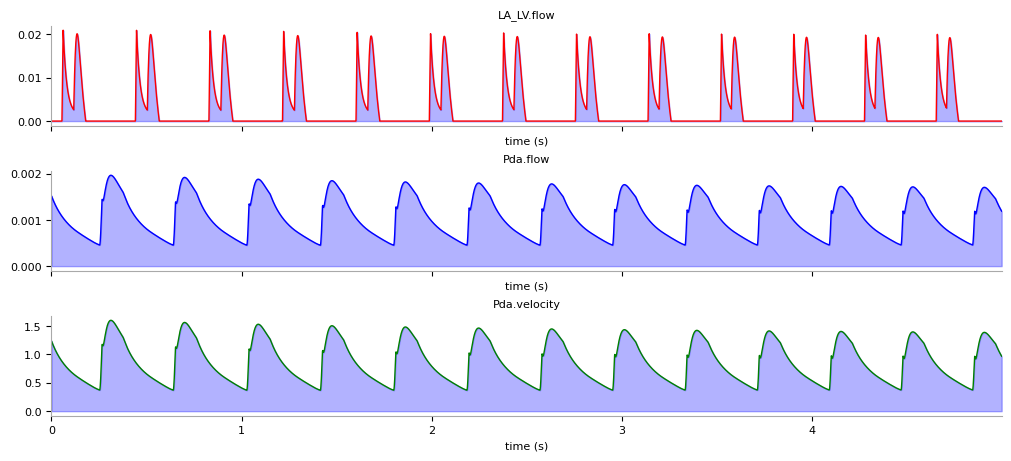

In [3]:
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)

print("")
print(
    "Opening the ductus arteriosus by increasing the diameter to 2.5 mm in 10 seconds"
)
neo.open_ductus(new_diameter=2.5, in_time=10.0)

# stabilize the model by calculating 60 seconds and plot the flow velocity across the pda

neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity", "Pda._current_diameter"],
    combined=False,
    sharey=False,
    time_to_calculate=15.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
    fill=True,
)
model.models["Breathing"].switch_breathing(True)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

# get the vaildation data from the model
result = neo.validate_pda()

# print the validation data
print("")
print("Model validation data:")
print("----------------------")
print(
    f"Heart rate max : {result['Heart.heart_rate.max']:<10.0f} bpm, min: {result['Heart.heart_rate.min']:<10.0f} bpm."
)
print(
    f"Bloodpressure  : {result['AA.pres.max']:<0.0f}/{result['AA.pres.min']:<0.0f} ({result['AA.pres.mean']:<0.0f}) mmHg"
)
print(f"LVO            : {result['LV_AA.flow.net']:<0.1f} ml/kg/min")
print(f"RVO            : {result['RV_PA.flow.net']:<0.1f} ml/kg/min")
print(f"SVC flow       : {result['SVC_RA.flow.net']:<0.1f} ml/kg/min")
print(f"PDA flow       : {result['Pda.flow.net']:<0.1f} ml/kg/min")
print(f"LVO/RVO ratio  : {round(result['LV_AA.flow.net']/result['RV_PA.flow.net'], 2)}")
print("")
print(
    "Note the pseudo-normalization of the E/A ratio in the extreme premature born baby with a large shunt across the ductus arteriosus"
)
print("")

# plot the flow across the mitral valve and pda flow velocity
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)
neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=5.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
)
model.models["Breathing"].switch_breathing(True)